### Synonymous compound analysis
We ended up screening 3 pairs of synonymous compounds. These are:
1. situgluside : dacuesterol
2. citronellol : beta-citronellol
3. coumaran : 2,3 dihydrobenzofuran

The following analysis is to check if the results for each of the compounds within the pairs are similar or different to each other

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp, kruskal
import statsmodels.api as sm

1. Reading in the data

In [20]:

xs = pd.read_csv('C:/Users/Emily/Documents/S1/S1_xs3.csv', index_col=0)
xs.head()

,(+)-Carvone,(-)-Borneol,(-)-Cedrene,HuperzineA,1-octanol,"2,3-Dihydrobenzofuran","2,5-Dihydroxybenzoic acid",2-Methyl-1-butanol,2-Nonylquinolin-4(1H)-one,2-nonanone,...,Taurine,Thiophene,Trans-Anethole,Ursolic acid,Vincristine (sulfate),p-Anisic acid,p-Tolualdehyde,trans-Cinnamaldehyde,α-Phellandrene,beta-Citronellol
0,-24.477970,-16.667470,16.183196,-10.592637,22.512030,-7.925637,-4.665970,18.469196,5.049530,5.959696,...,-12.264804,-13.365470,-3.226637,-22.890470,-9.830637,2.721196,-7.502304,-25.705637,-7.502304,-22.445970
1,-12.455304,-23.969970,8.753696,10.658696,11.441863,3.081030,-21.832137,11.568863,8.732530,3.737196,...,-7.629304,-9.195637,-14.571970,-15.545637,16.797030,16.733530,-1.681470,-21.810970,-0.326804,-7.565804
2,-14.677804,-6.084137,9.769696,2.403696,8.923030,-9.026304,-7.311804,17.495530,24.861530,14.553363,...,-25.261137,-15.037637,-22.805804,-12.010804,-8.200804,0.922030,-3.036137,-14.021637,5.409363,4.372196
3,-5.597304,2.276696,-2.655137,5.240030,5.917363,10.531696,0.054196,1.451196,-22.043804,20.247196,...,-22.191970,6.954530,3.970030,-19.038137,11.780530,14.172363,0.138863,-6.824970,10.891530,-5.766637
4,-22.107304,8.415030,-15.228137,-2.125970,10.044863,8.563196,2.530696,13.029363,-8.751137,-1.067637,...,-6.486304,12.542530,0.752696,-21.959137,-15.841970,8.266863,6.298363,-19.778970,5.155363,17.834196


2. Creating a function to subset the data for each compound from the larger dataset

In [22]:
def compound_dat(c, xdf):
    h  = xdf[c]
    hc = [x for x in h if str(x) != 'nan']
    #hcdic = {'Compound':c, 'Position':dc}
    #hcdf = pd.DataFrame(hcdic)
    return hc

In [11]:
pairs = [('Daucosterol', 'Sitogluside'), ('beta-Citronellol', 'Citronellol'), ('Coumaran','2,3-Dihydrobenzofuran')]
print(pairs) 

[('Daucosterol', 'Sitogluside'), ('beta-Citronellol', 'Citronellol'), ('Coumaran', '2,3-Dihydrobenzofuran')]


3. Parsing through the dataset subsetting the compound pairs
4. Confirming equal variances for each synonymous pair of compounds
5. Performing a students ttest to see if the distributions are similar. We use the median parameter because the data are skewed

In [24]:
hcdf = pd.DataFrame()
for p in pairs:
    d1 = compound_dat(p[0], xs)
    d2 = compound_dat(p[1], xs)
    #print(stats.levene(d1,d2, center='median'))
    #stat, p_value = ks_2samp(d1, d2)
    stat, p_value = ttest_ind(d1, d2)
    s, mwup = mannwhitneyu(d1, d2)
    hcdic = {'Compound pair': p, 'p-value':p_value, 'MWU':mwup}
    hcd = pd.DataFrame(hcdic)
    hcdf = hcdf.append(hcd)


6. We have confimed that the pvalue of Levene's test is >.05, so we can assume homgenaity of variance.
7. Given homogeneity of variance, we can proceed with performing the Mann Whitney U test

In [25]:
hcdf

,Compound pair,p-value,MWU
0,Daucosterol,1.587859e-03,9.576041e-04
1,Sitogluside,1.587859e-03,9.576041e-04
0,beta-Citronellol,4.155781e-01,1.596890e-01
1,Citronellol,4.155781e-01,1.596890e-01
0,Coumaran,1.333910e-07,8.328004e-10
1,"2,3-Dihydrobenzofuran",1.333910e-07,8.328004e-10


In [103]:
stat, p_value = ttest_ind(dc, sc)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=-3.1630, p-value=0.0016


In [104]:
stat, p_value = mannwhitneyu(sc, dc)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=365246.5000, p-value=0.0010


<AxesSubplot:xlabel='Position', ylabel='Density'>

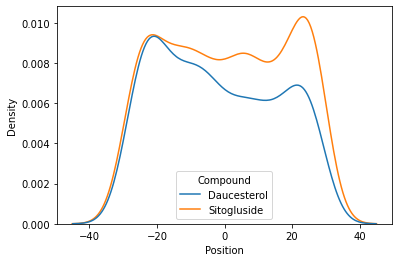

In [105]:
sns.kdeplot(data=wide, x='Position', hue='Compound')

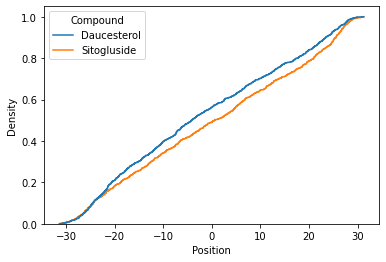

In [107]:
fig, ax = plt.subplots()
sns.histplot(x='Position', data=wide, hue='Compound', bins=len(ddf), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False)
fig.savefig('C:/Users/Emily/Desktop/ecdf.png')

In [72]:
ks_2samp(dc, sc)

KstestResult(statistic=0.08081195232297726, pvalue=0.005609195937808176)

In [112]:
stats.kruskal(dc,sc)

KruskalResult(statistic=9.629360775113005, pvalue=0.0019149124321844533)